### Name : Kang Yeongeun
### StudentNo. 20151532
#### github : https://github.com/yeonun/NLP_Assignment

#  Import the pakages 
## re for text data, panda for data analysis, matplot for drawing graph and numpy for calculating

In [1]:
from collections import Counter
import re
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File import

In [2]:
f=open("./ZOOTOPIA.txt")
data = f.read()

# Convert all characters to lowercase and parse them word by word

In [3]:
parse = re.sub("[^0-9a-zA-Z\\s]","",data)
parse = parse.lower().split()

## Save the names of the characters written in capital letters in the script

In [4]:
charnamelist = re.sub("[^0-9a-zA-Z\\s]","",data)
charnamelist = charnamelist.split()

charname = []
lowercharname =[]
for s in charnamelist:
    if s.isupper():
        charname.append(s)
        lowercharname.append(s.lower())

# Use 'Counter' to count by word

In [5]:
counts = Counter(parse)
counts = counts.most_common()

# Made a except word list for meaningful statistics.
## article, conjunctions, pronoun, charactrer name, etc...

In [6]:
articles = ["a","the","an"]
conjunctions = ["and","or","as","but","nor","so","while","although","however"\
                ,"instead","moreover","furthermore","likewise","specifically"\
                ,"way","yet","for","because","since","actually","that","though",\
                "admittedly","thus","therefor","after","before","when",\
                "while","until","whenever","next","first","second","finally",\
                "meanwile","until","unless","seen","also","beside","then",\
               "just","by","no","why","about","here","there","where","how"\
               ,"theres"]
pronouns = ["i","my","me","you","he","she","it","we","they","mine","yours",\
            "this","these","thats","those","who","what","which","one","none"\
            ,"any","some","each","every","other","others","another","anbody",\
            "its","her","his","him","was","were","dont","youre"\
           ,"their","your","shes","hes","them"]
etc = ["to","of","in","at","is","be","are","am","if","with","will","on",\
       "has","had","im","do","not","from","now","into","up"\
      ,"can","like","have","know","well","cant","been"]


exceptword = articles + conjunctions + pronouns + etc + charname + lowercharname

# Create a list of filtered words

In [7]:
length = len(counts)
newcount = []
for i in range(length):
    if counts[i][0] not in exceptword:
        newcount.append(counts[i])

# Create a DataFrame with filtered top 20 word

In [8]:
newcount_to_frame = pd.DataFrame(newcount[:20], columns=["word","counts"])
countsum = sum(newcount_to_frame["counts"])
print("""filtered top 20 are:

""", newcount_to_frame[:20])

filtered top 20 are:

      word  counts
0   looks      59
1     all      58
2     off      54
3      go      47
4   gonna      40
5     see      40
6     hey      40
7     did      37
8    okay      36
9    find      35
10    get      34
11   yeah      34
12   look      31
13   down      30
14    got      30
15    sir      30
16  think      29
17  going      28
18    our      25
19  thank      23


# Create a graph 

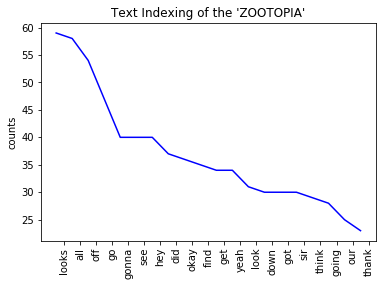

In [9]:
fword = [newcount[i][0] for i in range(len(newcount))][:20]
fnumber = [newcount[i][1] for i in range(len(newcount))][:20]
fxs = [i for i, _ in enumerate(fword)]
plt.plot(fxs, fnumber,'b')
plt.ylabel("counts")
plt.xticks([i+0.5 for i, _ in enumerate(fword)],fword,rotation = 90)
plt.title("Text Indexing of the 'ZOOTOPIA'")
plt.show()